<a href="https://colab.research.google.com/github/rohan-sharma84/AIMLCapstone/blob/main/Capstone_PCAandAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
project_path = r'/content/drive/MyDrive/CapstoneProject/Data/'

In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import csv
DATASET_FOLDER_TRAIN = project_path +"car_data/car_data/train/"
DATASET_FOLDER_TEST = "car_data/car_data/test/"
TRAIN_CSV = project_path + "anno_train.csv"
TEST_CSV = project_path + "anno_test.csv"
DATA_LABELS = np.array(pd.read_csv(project_path+'names.csv',\
                                   header = None))

In [5]:
df_train=pd.read_csv(TRAIN_CSV, header=None)

df_train.columns =['Image', 'x0', 'y0', 'x1', 'y1','Car_ref'] 
df_test=pd.read_csv(TEST_CSV, header=None)
df_test.columns =['Image', 'x0', 'y0', 'x1', 'y1','Car_ref'] 

In [6]:
df_train.shape

(8144, 6)

In [7]:
df_test.shape


(8041, 6)

In [8]:
df_train.head()


,Image,x0,y0,x1,y1,Car_ref
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106


In [9]:
## Some names contain '/' like 155 record in train data as the file location has - instead of /
## We will have to replace this with '-' since the folder location in data has '-'
# adding car name to train
df_train["Car_name"] = ''
df_test["Car_name"] = ''
i=0
for ref in df_train["Car_ref"]:
  ref=DATA_LABELS[ref-1][0]
  df_train["Car_name"][i] = ref.replace("/" ,"-")## We will have to replace this with '-' since the folder location in data has '-'
  i=i+1


In [10]:
df_train.head()

,Image,x0,y0,x1,y1,Car_ref,Car_name
0,00001.jpg,39,116,569,375,14,Audi TTS Coupe 2012
1,00002.jpg,36,116,868,587,3,Acura TL Sedan 2012
2,00003.jpg,85,109,601,381,91,Dodge Dakota Club Cab 2007
3,00004.jpg,621,393,1484,1096,134,Hyundai Sonata Hybrid Sedan 2012
4,00005.jpg,14,36,133,99,106,Ford F-450 Super Duty Crew Cab 2012


In [11]:
# Adding file location and file folder location to the 
df_train['File_loc']='/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train/'+df_train['Car_name']+'/'+df_train['Image']
df_train['File_Folder']='/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train/'+df_train['Car_name']
df_train.head()


,Image,x0,y0,x1,y1,Car_ref,Car_name,File_loc,File_Folder
0,00001.jpg,39,116,569,375,14,Audi TTS Coupe 2012,/content/drive/MyDrive/CapstoneProject/Data/ca...,/content/drive/MyDrive/CapstoneProject/Data/ca...
1,00002.jpg,36,116,868,587,3,Acura TL Sedan 2012,/content/drive/MyDrive/CapstoneProject/Data/ca...,/content/drive/MyDrive/CapstoneProject/Data/ca...
2,00003.jpg,85,109,601,381,91,Dodge Dakota Club Cab 2007,/content/drive/MyDrive/CapstoneProject/Data/ca...,/content/drive/MyDrive/CapstoneProject/Data/ca...
3,00004.jpg,621,393,1484,1096,134,Hyundai Sonata Hybrid Sedan 2012,/content/drive/MyDrive/CapstoneProject/Data/ca...,/content/drive/MyDrive/CapstoneProject/Data/ca...
4,00005.jpg,14,36,133,99,106,Ford F-450 Super Duty Crew Cab 2012,/content/drive/MyDrive/CapstoneProject/Data/ca...,/content/drive/MyDrive/CapstoneProject/Data/ca...


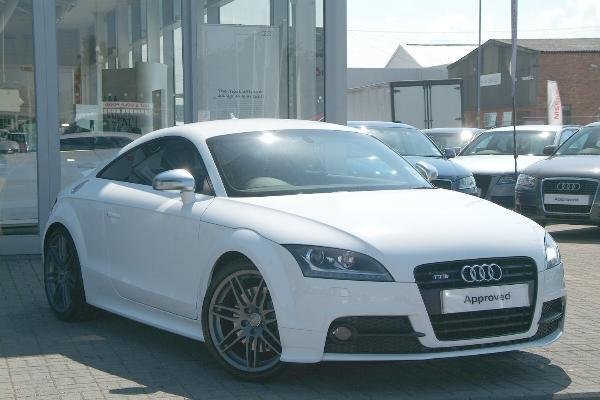

(400, 600, 3)

In [26]:
import cv2
from google.colab.patches import cv2_imshow
filename='/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train/Audi TTS Coupe 2012/00001.jpg'
img = cv2.imread(filename)
cv2_imshow(img)
img.shape

In [13]:
# Splitting the image in R,G,B arrays.
 
blue,green,red = cv2.split(img) 
#it will split the original image into Blue, Green and Red arrays.

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#initialize PCA with first 20 principal components
pca = PCA(20)
 
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)
 
#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)

In [16]:
img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)

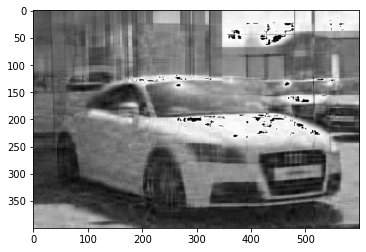

In [17]:
#viewing the compressed image
plt.imshow(img_compressed)

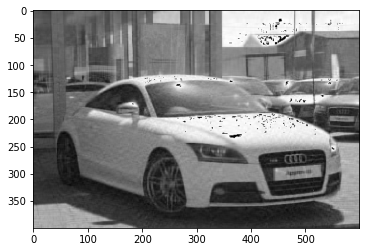

In [19]:
#initialize PCA with first 50 principal components
pca = PCA(50)
 
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)
 
#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)
img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)
#viewing the compressed image
plt.imshow(img_compressed)

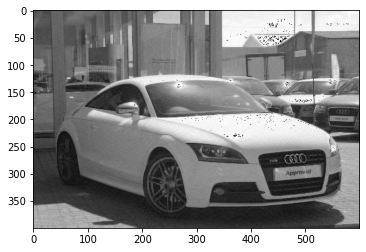

In [20]:
#initialize PCA with first 100 principal components
pca = PCA(100)
 
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)
 
#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)
img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)
#viewing the compressed image
plt.imshow(img_compressed)

(400, 600, 3)

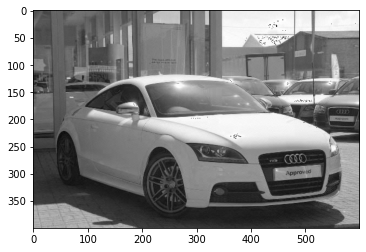

In [25]:
#initialize PCA with first 200 principal components
pca = PCA(200)
 
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)
 
#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)
img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)
#viewing the compressed image
plt.imshow(img_compressed)
img_compressed.shape

In [27]:
from pickle import dump
from pickle import load   ##load from existing

X_train=load(open('/content/drive/MyDrive/CapstoneProject/Pickles/X_train.pkl', 'rb'))
#X_test=load(open('/content/drive/MyDrive/CapstoneProject/Pickles/cropped/X_test.npy', 'rb'))


In [55]:
import matplotlib.pyplot as plt
def plotImage(X):
    plt.figure(figsize=(10, 10))
    plt.imshow(X.reshape(128,128,3))
    plt.show()
    plt.close()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


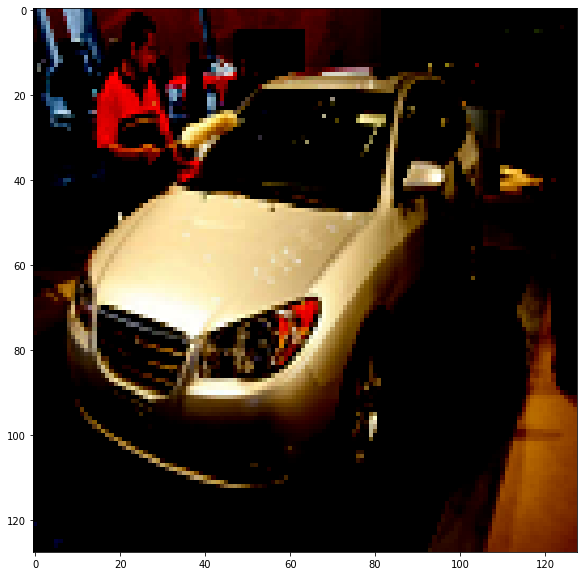

In [56]:
plotImage(X_train[12, :])

In [57]:
X_train.shape

(8144, 49152)

In [33]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]*X_train.shape[3])

In [34]:
X_train.shape

(8144, 49152)

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=400, random_state=0, svd_solver='randomized')
pca.fit(X_train)


PCA(copy=True, iterated_power='auto', n_components=400, random_state=0,
    svd_solver='randomized', tol=0.0, whiten=False)

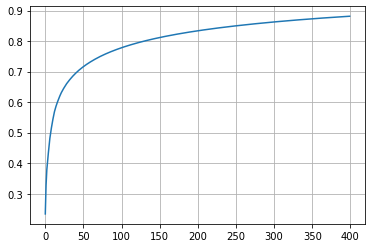

In [88]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.ylim(0.8, 1.0)
plt.grid()

In [84]:
DD = np.dot(X_train - pca.mean_, pca.components_.T)

In [85]:
DD.shape

(8144, 400)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


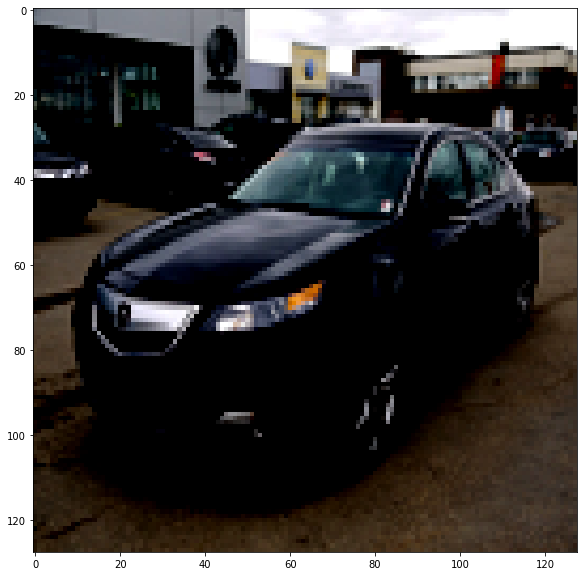

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


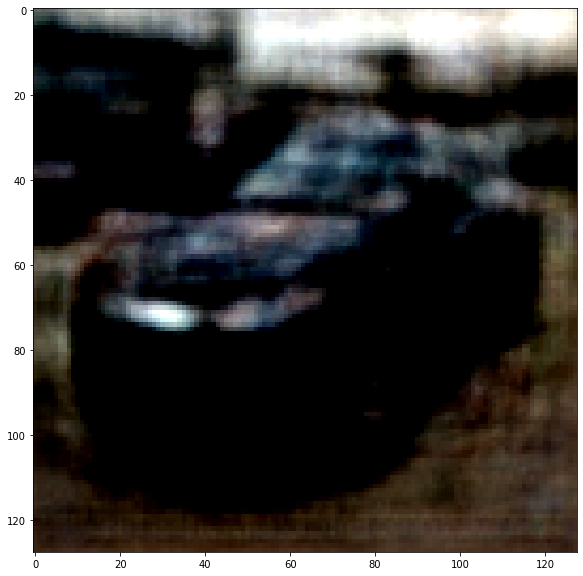

In [86]:
imageNum=1
def reconstruct(pca, vec):
    return pca.mean_ + np.dot(vec, pca.components_)


plotImage(X_train[imageNum, :])
plotImage(reconstruct(pca, DD[imageNum]))



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


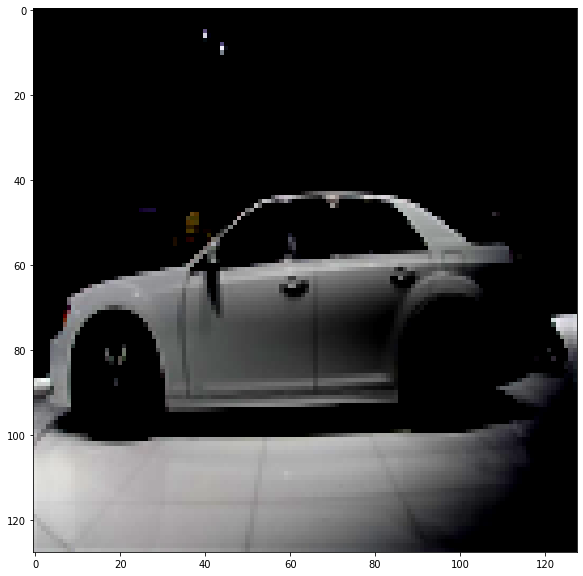

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


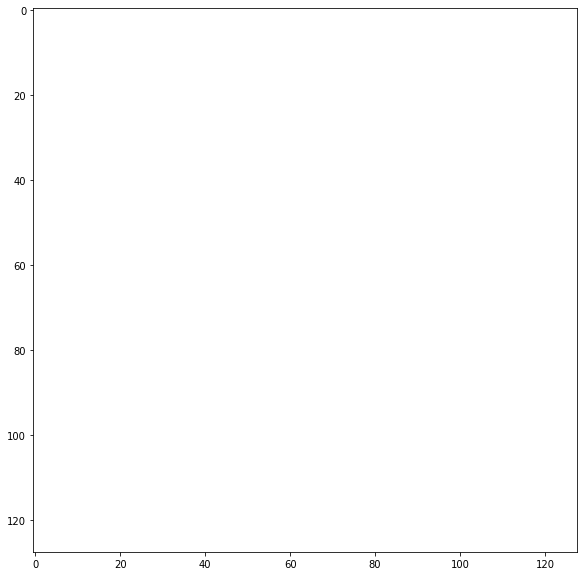

In [103]:
def whiten(pca, vec):
    QQ = np.dot(vec - pca.mean_, pca.components_.T)
    return np.dot(QQ / pca.singular_values_, pca.components_) * np.sqrt(60000) * 64 + 128

imageNum=20
plotImage(X_train[imageNum, :])

plotImage(whiten(pca, X_train[imageNum]))